## 0. Introduction

**Problem Statement**

Engagement rate merupakan salah satu metrik penting dalam mengevaluasi performa konten di platform media sosial. Namun, tingkat engagement suatu konten dipengaruhi oleh berbagai faktor, seperti karakteristik platform, jenis konten, waktu publikasi, serta profil kreator. Oleh karena itu, diperlukan sebuah model prediktif yang mampu memperkirakan engagement rate berdasarkan informasi yang tersedia sebelum konten dipublikasikan (pre-upload features).

Proyek ini bertujuan untuk membangun model regresi yang dapat memprediksi engagement rate menggunakan fitur-fitur pre-upload, sehingga dapat membantu memahami faktor-faktor utama yang memengaruhi engagement dan memberikan estimasi performa konten secara kuantitatif.

**Scope dan Batasan Proyek**

* Proyek ini menggunakan fitur pre-upload, yaitu informasi yang tersedia sebelum konten dipublikasikan.

* Target yang diprediksi adalah engagement rate, yang didefinisikan sebagai rasio interaksi terhadap jumlah tayangan.

* Evaluasi model dilakukan menggunakan metrik MAE, RMSE, R², dan sMAPE.

## 1. Setup Environment

In [3]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# pengaturan tampilan agar visualisasi rapi
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline

print("Environment Ready")

Environment Ready


## 2. Data Understanding and Feature Definition

### load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "/content/drive/MyDrive/youtube_shorts_tiktok_trends_2025.csv"
df = pd.read_csv(file_path)

### data understanding

In [5]:
print("Data Awal (5 baris pertama):")
display(df.head())

print("\nInformasi DataFrame:")
df.info()

print("\nStatistik Deskriptif (kolom numerik):")
display(df.describe(include=[np.number]))


Data Awal (5 baris pertama):


,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,...,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
0,TikTok,Jp,Asia,ja,Gaming,#Lifestyle,Night Routine — College,NextVision,trending,8bit loop,...,External,1,2e681528d17a1fe1986857942536ec27,30317,0.086159,0.004004,120.069,0.086159,0.012555,0.007830
1,TikTok,Se,Europe,sv,Food,#Sports,Morning Routine — College,DailyVlogsDiego,trending,Street vibe,...,Search,0,2e35fa0b2978b9cae635839c1d4e9e74,30577,0.085298,0.002421,113.005,0.085298,0.007850,0.007791
2,TikTok,Za,Africa,en,Art,#Workout,Night Routine — College,BeyondHub,licensed,Gallery pad,...,External,1,0d88a011235a82244995ef52961f9502,503,0.049154,0.001625,68.111,0.049154,0.004469,0.005146
3,TikTok,Kr,Asia,ko,News,#Esports,Best Settings for Fortnite,NextHub,original,Neutral piano,...,Search,1,e15cff7621ed3f9eb9d2c97c841be0f3,7828,0.086257,0.003164,108.156,0.086257,0.011205,0.005292
4,TikTok,Au,Oceania,en,Beauty,#Comedy,When your friend is Beginners,LucasOfficial,licensed,Soft glam loop,...,ForYou,1,d696b4f0a50ea70e7cb5021be7e198ec,1171,0.051441,0.001175,72.400,0.051441,0.004204,0.004142



Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48079 entries, 0 to 48078
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   platform                 48079 non-null  object 
 1   country                  48079 non-null  object 
 2   region                   48079 non-null  object 
 3   language                 48079 non-null  object 
 4   category                 48079 non-null  object 
 5   hashtag                  48079 non-null  object 
 6   title_keywords           48079 non-null  object 
 7   author_handle            48079 non-null  object 
 8   sound_type               48079 non-null  object 
 9   music_track              48079 non-null  object 
 10  week_of_year             48079 non-null  int64  
 11  duration_sec             48079 non-null  int64  
 12  views                    48079 non-null  int64  
 13  likes                    48079 non-null  int64  
 14  

,week_of_year,duration_sec,views,likes,comments,shares,saves,engagement_rate,upload_hour,trend_duration_days,...,avg_watch_time_sec,completion_rate,is_weekend,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
count,48079.000000,48079.000000,4.807900e+04,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,...,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000
mean,18.234260,34.489320,9.929276e+04,5737.732108,628.657314,553.484494,591.071487,0.075415,15.986751,13.742923,...,21.662460,0.635308,0.622995,7510.945402,0.057607,0.002462,75.415322,0.057607,0.006310,0.005556
std,9.996924,16.401608,1.318522e+05,8639.923653,967.782704,849.436172,978.280616,0.030091,5.489399,13.343582,...,10.583019,0.112604,0.484641,11262.284575,0.023123,0.001586,30.090519,0.023123,0.002969,0.002496
min,1.000000,5.000000,7.940000e+02,33.000000,3.000000,3.000000,2.000000,0.014720,0.000000,3.000000,...,2.800000,0.400000,0.000000,43.000000,0.011792,0.000000,14.720000,0.011792,0.000975,0.000735
25%,10.000000,22.000000,3.032250e+04,1526.000000,160.000000,143.000000,138.000000,0.052326,13.000000,5.000000,...,14.000000,0.548000,0.000000,1998.000000,0.039941,0.001273,52.326000,0.039941,0.004058,0.003670
50%,18.000000,31.000000,5.962000e+04,3167.000000,339.000000,301.000000,301.000000,0.071575,17.000000,7.000000,...,19.400000,0.635000,1.000000,4159.000000,0.054654,0.002138,71.575000,0.054654,0.005809,0.005163
75%,27.000000,43.000000,1.180945e+05,6618.000000,720.000000,635.000000,659.500000,0.094794,20.000000,17.000000,...,27.000000,0.724000,1.000000,8675.000000,0.072280,0.003276,94.793500,0.072281,0.008016,0.007000
max,35.000000,90.000000,3.080686e+06,310916.000000,31776.000000,29004.000000,29679.000000,0.235819,23.000000,60.000000,...,67.300000,0.850000,1.000000,390142.000000,0.185300,0.012718,235.819000,0.185300,0.023668,0.020328


### chek missing value

In [6]:
# missing values summary
print("Jumlah baris/kolom:", df.shape)

missing_summary = (
    df.isna()
      .sum()
      .sort_values(ascending=False)
      .to_frame("missing_count")
)
missing_summary["missing_pct"] = (missing_summary["missing_count"] / len(df) * 100).round(2)

print("\nRingkasan missing value (top 20 kolom):")
display(missing_summary.head(20))

Jumlah baris/kolom: (48079, 58)

Ringkasan missing value (top 20 kolom):


,missing_count,missing_pct
platform,0,0.0
country,0,0.0
region,0,0.0
language,0,0.0
category,0,0.0
hashtag,0,0.0
title_keywords,0,0.0
author_handle,0,0.0
sound_type,0,0.0
music_track,0,0.0


### validasi target ( engagement_rate )

In [7]:
# validasi target
assert "engagement_rate" in df.columns, "Kolom 'engagement_rate' tidak ditemukan di dataset."

# pastikan numerikal
df["engagement_rate_raw"] = df["engagement_rate"]
df["engagement_rate"] = pd.to_numeric(df["engagement_rate"], errors="coerce")

n_invalid = df["engagement_rate"].isna().sum() - pd.isna(df["engagement_rate_raw"]).sum()
print("Jumlah nilai engagement_rate yang tidak bisa dikonversi ke numeric:", int(max(n_invalid, 0)))

# cek nilai negatif
neg_count = (df["engagement_rate"] < 0).sum(skipna=True)
print("Jumlah engagement_rate negatif:", int(neg_count))

if neg_count > 0:
    df.loc[df["engagement_rate"] < 0, "engagement_rate"] = np.nan
    print("Nilai negatif diset menjadi NaN.")

Jumlah nilai engagement_rate yang tidak bisa dikonversi ke numeric: 0
Jumlah engagement_rate negatif: 0


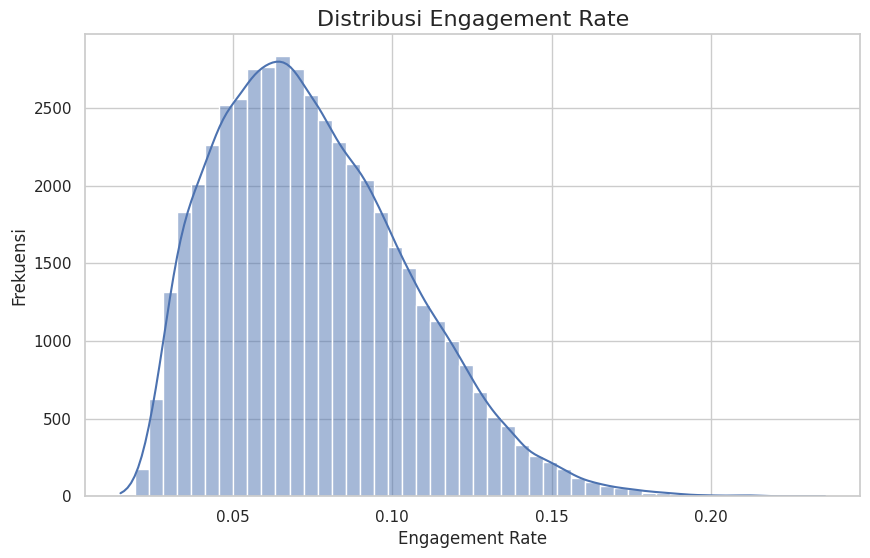

In [8]:
# plotting distribusi target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["engagement_rate"], bins=50, kde=True)

plt.title("Distribusi Engagement Rate", fontsize=16)
plt.xlabel("Engagement Rate")
plt.ylabel("Frekuensi")

plt.show()

### prediksi engagement rate konten TikTok & YouTube

untuk membantu memastikan output pada implementasi model di aplikasi

In [ ]:
df.groupby('platform')['engagement_rate'].mean()

,engagement_rate
platform,
TikTok,0.091781
YouTube,0.050875


In [ ]:
df.groupby('platform')['engagement_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
TikTok,28844.0,0.091781,0.025955,0.030847,0.072508,0.088813,0.107725,0.235819
YouTube,19235.0,0.050875,0.015786,0.014720,0.038831,0.049080,0.061033,0.125377


### definisi targe dan filtering fitur pre-upload

In [ ]:
TARGET = "engagement_rate"

In [ ]:
PREUPLOAD_FEATURES = [
    # konten & metadata
    "platform",
    "genre",
    "category",
    "duration_sec",
    "title_length",
    "has_emoji",
    "title_keywords",
    "hashtag",
    "tags",

    # waktu publish
    "upload_hour",
    "publish_dayofweek",
    "publish_period",
    "is_weekend",

    # konteks audience
    "country",
    "region",
    "language",
    "event_season",
    "season",

    # profil creator
    "creator_avg_views",
    "creator_tier"
]

# cek fitur yang tidak ditemukan
missing_features = [f for f in PREUPLOAD_FEATURES if f not in df.columns]
if missing_features:
    print("Fitur tidak ditemukan dan akan diabaikan:", missing_features)

# filter fitur yang benar-benar ada
FINAL_FEATURES = [f for f in PREUPLOAD_FEATURES if f in df.columns]

df_model = df[FINAL_FEATURES + [TARGET]].copy()

print("Shape df_model:", df_model.shape)
print(df_model.head())


Shape df_model: (48079, 21)
  platform      genre category  duration_sec  title_length  has_emoji  \
0   TikTok  Lifestyle   Gaming            40            31          1   
1   TikTok     Sports     Food            18            24          1   
2   TikTok     Sports      Art            22            22          0   
3   TikTok     Gaming     News            36            30          1   
4   TikTok     Comedy   Beauty            35            13          1   

                  title_keywords     hashtag  \
0        Night Routine — College  #Lifestyle   
1      Morning Routine — College     #Sports   
2        Night Routine — College    #Workout   
3     Best Settings for Fortnite    #Esports   
4  When your friend is Beginners     #Comedy   

                                                tags  upload_hour  ...  \
0                       daily, lifestyle, motivation           15  ...   
1                             gym, football, workout            3  ...   
2                     

## 3. EDA Awal

### fitur utama

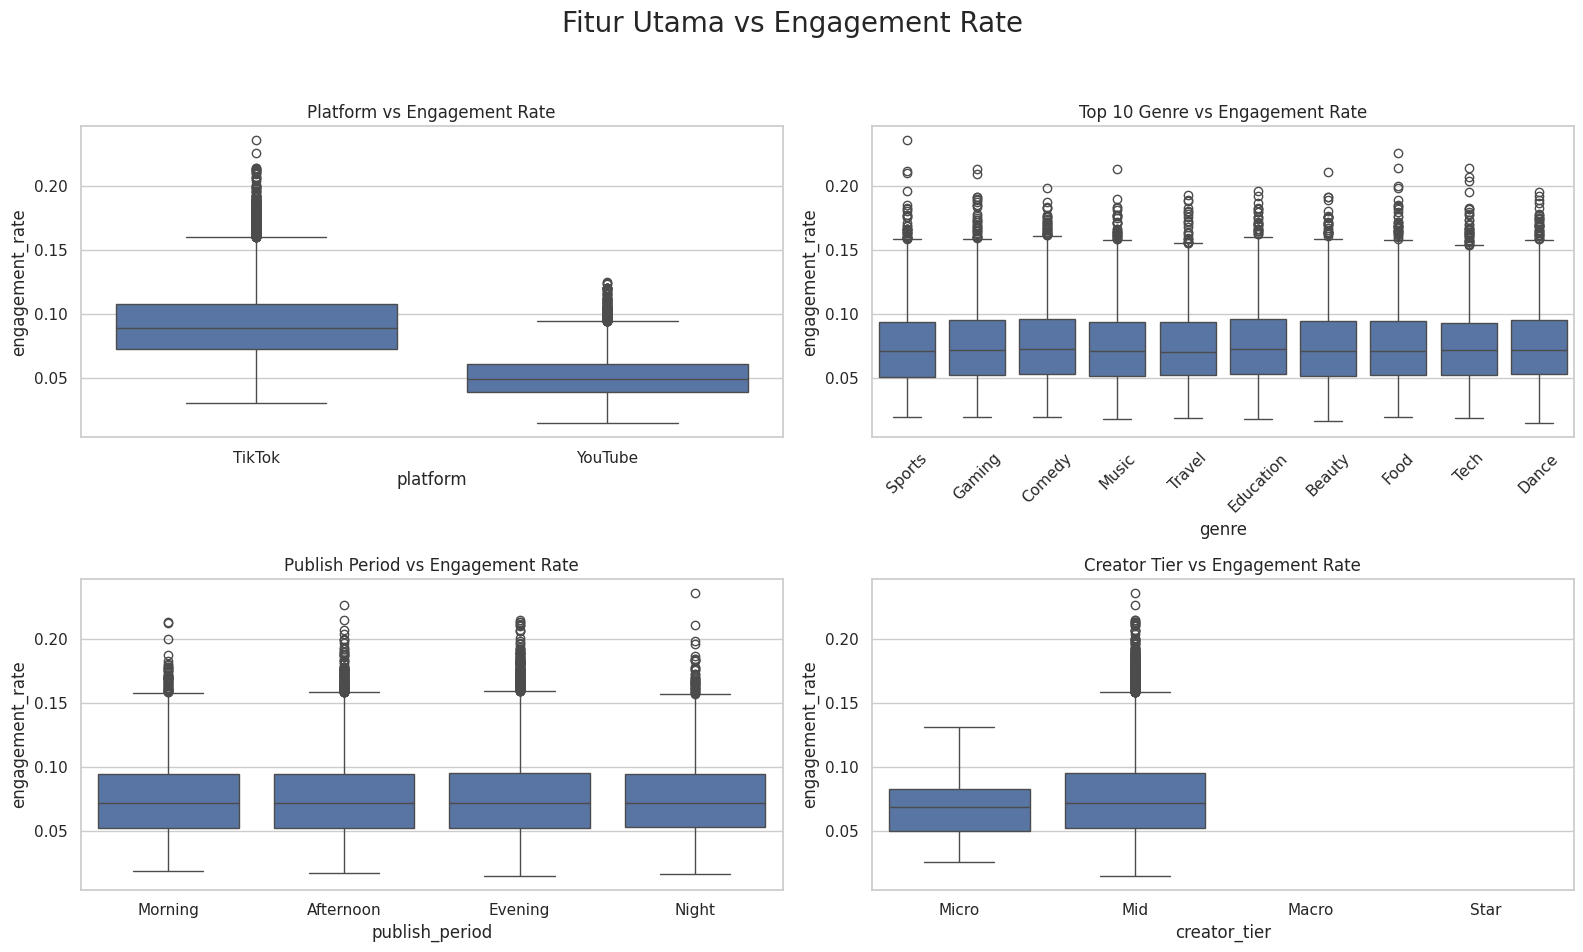

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Fitur Utama vs Engagement Rate", fontsize=20)

# Platform vs Engagement
sns.boxplot(
    ax=axes[0, 0],
    data=df_model,
    x="platform",
    y="engagement_rate"
)
axes[0, 0].set_title("Platform vs Engagement Rate")

# Genre vs Engagement (Top 10)
top_genres = df_model["genre"].value_counts().head(10).index
sns.boxplot(
    ax=axes[0, 1],
    data=df_model[df_model["genre"].isin(top_genres)],
    x="genre",
    y="engagement_rate"
)
axes[0, 1].set_title("Top 10 Genre vs Engagement Rate")
axes[0, 1].tick_params(axis='x', rotation=45)

# Publish Period vs Engagement
sns.boxplot(
    ax=axes[1, 0],
    data=df_model,
    x="publish_period",
    y="engagement_rate",
    order=["Morning", "Afternoon", "Evening", "Night"]
)
axes[1, 0].set_title("Publish Period vs Engagement Rate")

# Creator Tier vs Engagement
sns.boxplot(
    ax=axes[1, 1],
    data=df_model,
    x="creator_tier",
    y="engagement_rate",
    order=["Micro", "Mid", "Macro", "Star"]
)
axes[1, 1].set_title("Creator Tier vs Engagement Rate")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### numerik

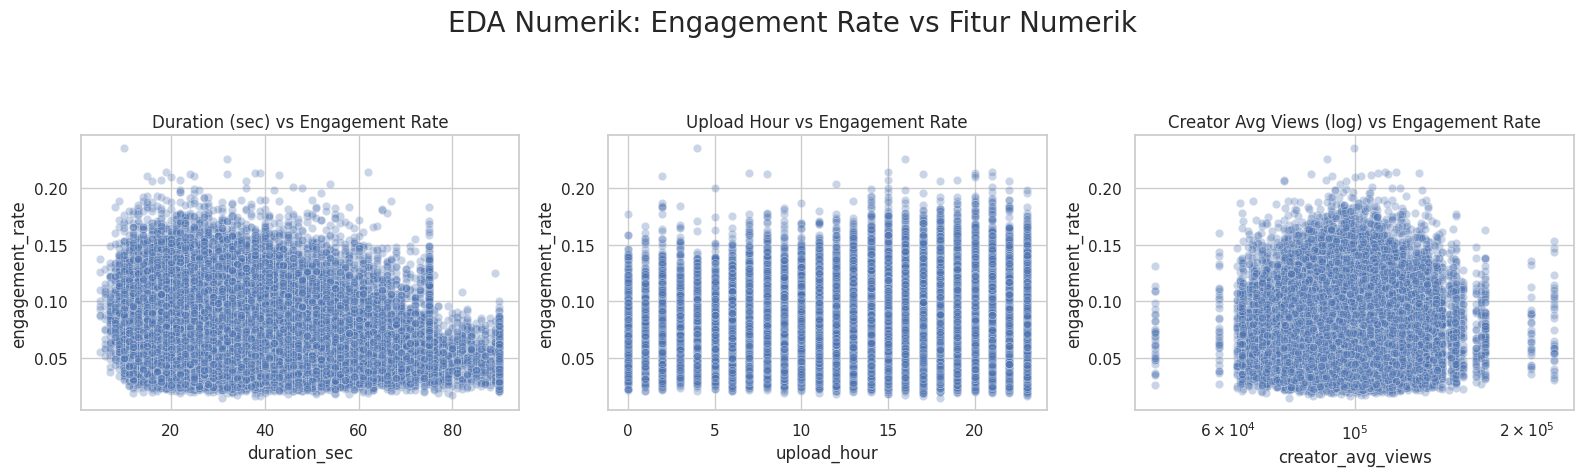

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle("EDA Numerik: Engagement Rate vs Fitur Numerik", fontsize=20)

# Duration vs Engagement
sns.scatterplot(
    ax=axes[0],
    data=df_model,
    x="duration_sec",
    y="engagement_rate",
    alpha=0.3
)
axes[0].set_title("Duration (sec) vs Engagement Rate")

# Upload Hour vs Engagement
sns.scatterplot(
    ax=axes[1],
    data=df_model,
    x="upload_hour",
    y="engagement_rate",
    alpha=0.3
)
axes[1].set_title("Upload Hour vs Engagement Rate")

# Creator Avg Views vs Engagement (log-scale X)
sns.scatterplot(
    ax=axes[2],
    data=df_model,
    x="creator_avg_views",
    y="engagement_rate",
    alpha=0.3
)
axes[2].set_xscale("log")
axes[2].set_title("Creator Avg Views (log) vs Engagement Rate")

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

### efek musiman

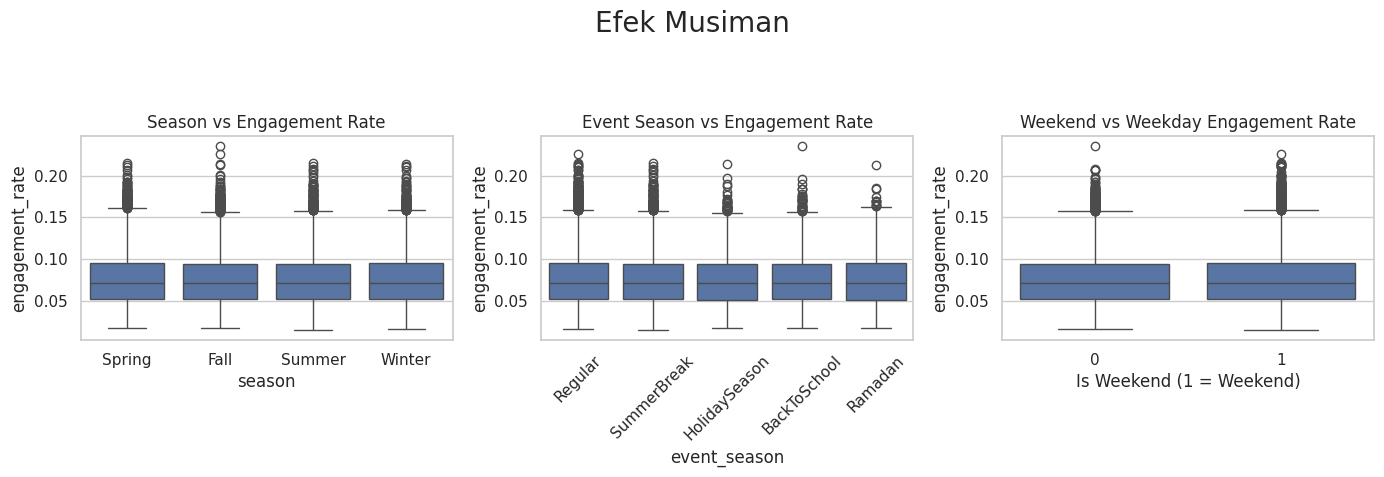

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
fig.suptitle("Efek Musiman", fontsize=20)

# Season vs Engagement
sns.boxplot(
    ax=axes[0],
    data=df_model,
    x="season",
    y="engagement_rate"
)
axes[0].set_title("Season vs Engagement Rate")

# Event Season vs Engagement
sns.boxplot(
    ax=axes[1],
    data=df_model,
    x="event_season",
    y="engagement_rate"
)
axes[1].set_title("Event Season vs Engagement Rate")
axes[1].tick_params(axis="x", rotation=45)

# Weekend vs Engagement
sns.boxplot(
    ax=axes[2],
    data=df_model,
    x="is_weekend",
    y="engagement_rate"
)
axes[2].set_title("Weekend vs Weekday Engagement Rate")
axes[2].set_xlabel("Is Weekend (1 = Weekend)")

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

### fitur tambahan

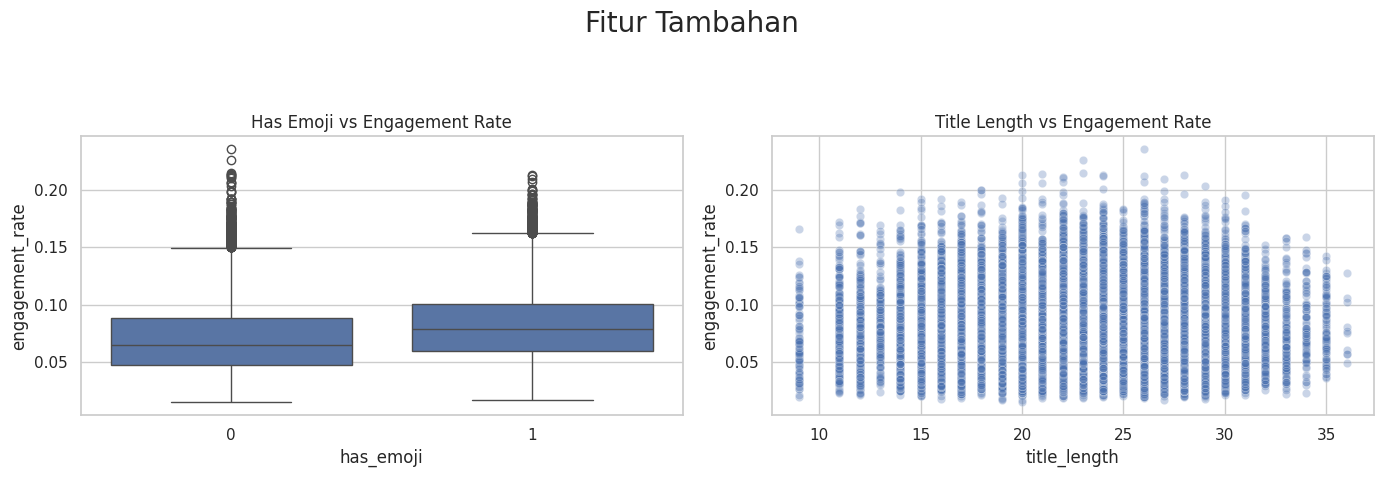

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Fitur Tambahan", fontsize=20)

# Emoji vs Engagement
sns.boxplot(
    ax=axes[0],
    data=df_model,
    x="has_emoji",
    y="engagement_rate"
)
axes[0].set_title("Has Emoji vs Engagement Rate")

# Title Length vs Engagement
sns.scatterplot(
    ax=axes[1],
    data=df_model,
    x="title_length",
    y="engagement_rate",
    alpha=0.3
)
axes[1].set_title("Title Length vs Engagement Rate")

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

### Korelasi

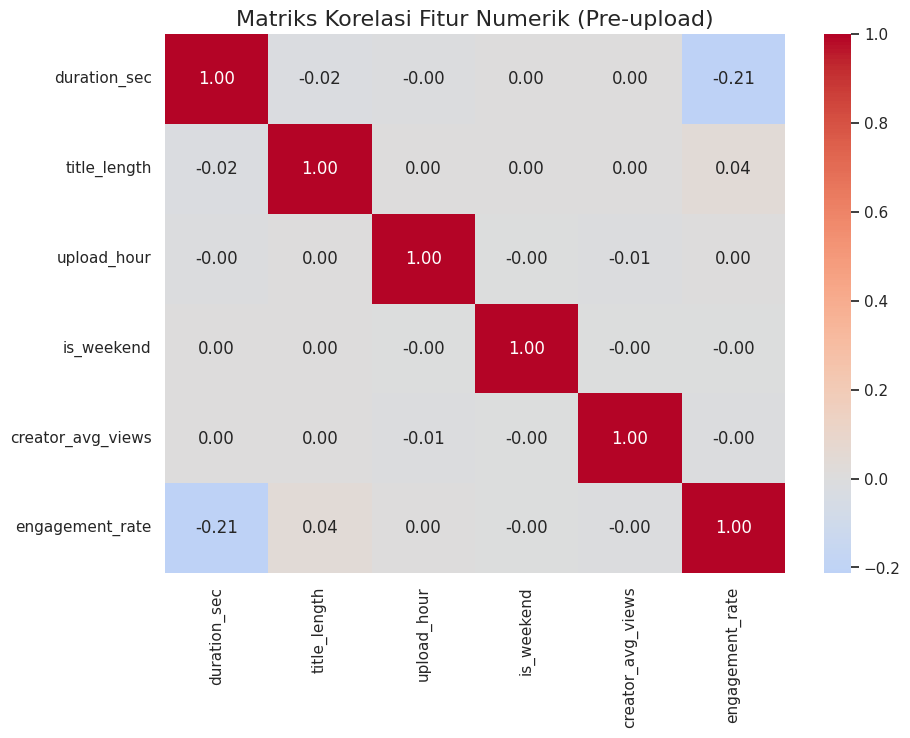

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    "duration_sec",
    "title_length",
    "upload_hour",
    "is_weekend",
    "creator_avg_views",
    "engagement_rate"  # target (hanya untuk interpretasi)
]

corr_df = df_model[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_df,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    center=0
)

plt.title("Matriks Korelasi Fitur Numerik (Pre-upload)", fontsize=16)
plt.show()

## 4. Preprocessing

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### train-test split

In [ ]:
X = df_model.drop(columns=[TARGET])
y = df_model[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)

X_train: (38463, 20) X_test: (9616, 20)


### pipeline

In [ ]:
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numerical cols:", numerical_cols)
print("Categorical cols:", categorical_cols)

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ],
    remainder="drop"  # hanya pakai kolom yang sudah terdefinisi
)

print("Preprocessor siap.")

Numerical cols: ['duration_sec', 'title_length', 'has_emoji', 'upload_hour', 'is_weekend', 'creator_avg_views']
Categorical cols: ['platform', 'genre', 'category', 'title_keywords', 'hashtag', 'tags', 'publish_dayofweek', 'publish_period', 'country', 'region', 'language', 'event_season', 'season', 'creator_tier']
Preprocessor siap.


## 5. Baseline Model

model ini digunakan sebagai tolok ukur minimum yang harus dikalahkan oleh model prediktif selanjutnya.

### dummy regressor

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# sMAPE
def smape(y_true, y_pred, eps=1e-8):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    denom = np.abs(y_true) + np.abs(y_pred) + eps
    return 100.0 * np.mean(2.0 * np.abs(y_true - y_pred) / denom)

# preprocessing + dummy model
baseline_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DummyRegressor(strategy="mean"))
])

# train
baseline_model.fit(X_train, y_train)

# predict
y_pred_train = baseline_model.predict(X_train)
y_pred_test = baseline_model.predict(X_test)

### evaluasi

In [ ]:
def evaluate(y_true, y_pred, label=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    smape_val = smape(y_true, y_pred)

    print(f"{label} MAE   : {mae:.5f}")
    print(f"{label} RMSE  : {rmse:.5f}")
    print(f"{label} R2    : {r2:.5f}")
    print(f"{label} sMAPE : {smape_val:.2f}%")
    print("-" * 35)

print("Baseline Performance (Dummy Regressor)")
evaluate(y_train, y_pred_train, "Train")
evaluate(y_test, y_pred_test, "Test")

Baseline Performance (Dummy Regressor)
Train MAE   : 0.02433
Train RMSE  : 0.03004
Train R2    : 0.00000
Train sMAPE : 33.19%
-----------------------------------
Test MAE   : 0.02437
Test RMSE  : 0.03031
Test R2    : -0.00027
Test sMAPE : 32.99%
-----------------------------------



**Interpretasi Hasil**

* MAE (Mean Absolute Error)

Nilai MAE berada pada kisaran 0.024, yang berarti rata-rata kesalahan prediksi sekitar 0.024 poin engagement rate, atau setara dengan ±2.4 percentage points engagement.

MAE bukan persen, melainkan error absolut dalam satuan rasio engagement_rate.

* RMSE (Root Mean Squared Error)

RMSE sedikit lebih tinggi daripada MAE, menunjukkan adanya beberapa kesalahan yang relatif lebih besar, namun masih dalam rentang yang konsisten dengan skala target.

* R² (Coefficient of Determination)

Nilai R² mendekati nol (bahkan sedikit negatif pada data test), yang menunjukkan bahwa model baseline tidak mampu menjelaskan variasi engagement_rate di luar nilai rata-rata.

Hal ini sesuai dengan karakteristik Dummy Regressor dan tidak mengindikasikan masalah pada data.

* sMAPE (Symmetric Mean Absolute Percentage Error)

Nilai sMAPE sekitar 33%, yang merepresentasikan kesalahan relatif rata-rata antara prediksi dan nilai aktual.

Untuk target berbentuk rasio kecil seperti engagement_rate, nilai ini tergolong baseline yang wajar.

---

**Konsistensi Train vs Test**

Nilai MAE, RMSE, dan sMAPE pada data train dan test sangat mirip, yang menunjukkan: tidak ada overfitting, tidak ada indikasi data leakage, pipeline evaluasi berjalan dengan benar.

**Kesimpulan Baseline**

Model baseline menghasilkan rata-rata kesalahan prediksi sekitar 2.4 poin persentase engagement rate (MAE ≈ 0.024) dengan kesalahan relatif sekitar 33% (sMAPE). Nilai ini menjadi ambang performa minimum yang harus dilampaui oleh model yang dikembangkan selanjutnya agar dapat dianggap memberikan nilai prediktif yang signifikan.

## 6. Model Comparison and Selection

### setup model kandidat

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),

    "Random Forest": RandomForestRegressor(
        n_estimators=80,
        max_depth=14,
        random_state=42,
        n_jobs=-1
    ),

    "XGBoost": XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )
}

print("Model kandidat:", list(models.keys()))

Model kandidat: ['Linear Regression', 'Random Forest', 'XGBoost']


### cross-validation metrics (RMSE, MAE, R², sMAPE)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def smape(y_true, y_pred, eps=1e-8):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    denom = np.abs(y_true) + np.abs(y_pred) + eps
    return 100.0 * np.mean(2.0 * np.abs(y_true - y_pred) / denom)

cv = KFold(n_splits=3, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    y_cv_pred = cross_val_predict(
        pipe,
        X_train,
        y_train,
        cv=cv,
        n_jobs=-1
    )

    mae = mean_absolute_error(y_train, y_cv_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_cv_pred))
    r2 = r2_score(y_train, y_cv_pred)
    s = smape(y_train, y_cv_pred)

    results.append((name, mae, rmse, r2, s))

    print(name)
    print(f"  CV MAE   : {mae:.5f}")
    print(f"  CV RMSE  : {rmse:.5f}")
    print(f"  CV R2    : {r2:.5f}")
    print(f"  CV sMAPE : {s:.2f}%")
    print("-" * 40)

results_df = pd.DataFrame(
    results,
    columns=["model", "cv_mae", "cv_rmse", "cv_r2", "cv_smape"]
).sort_values("cv_rmse")

display(results_df)

Linear Regression
  CV MAE   : 0.01861
  CV RMSE  : 0.02391
  CV R2    : 0.36619
  CV sMAPE : 25.38%
----------------------------------------
Random Forest
  CV MAE   : 0.01748
  CV RMSE  : 0.02243
  CV R2    : 0.44211
  CV sMAPE : 23.73%
----------------------------------------
XGBoost
  CV MAE   : 0.01759
  CV RMSE  : 0.02259
  CV R2    : 0.43450
  CV sMAPE : 23.89%
----------------------------------------


,model,cv_mae,cv_rmse,cv_r2,cv_smape
1,Random Forest,0.017478,0.022434,0.442111,23.730200
2,XGBoost,0.017594,0.022587,0.434505,23.885061
0,Linear Regression,0.018611,0.023912,0.366192,25.379796


### Perbandingan MAE (CV)

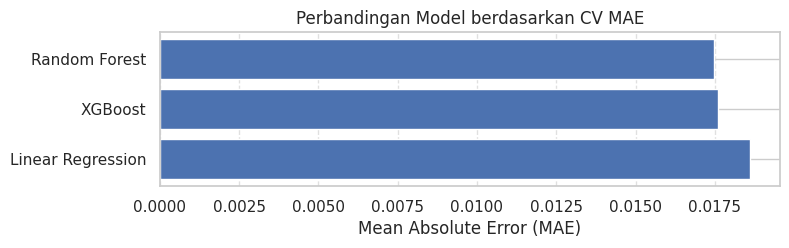

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
plt.barh(
    results_df["model"],
    results_df["cv_mae"]
)

plt.xlabel("Mean Absolute Error (MAE)")
plt.title("Perbandingan Model berdasarkan CV MAE")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


### Perbandingan sMAPE (CV)

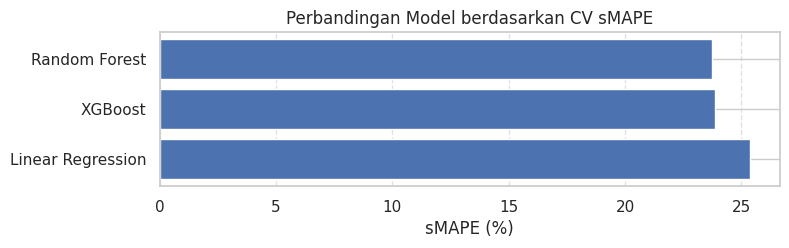

In [ ]:
plt.figure(figsize=(8, 2))
plt.barh(
    results_df["model"],
    results_df["cv_smape"]
)

plt.xlabel("sMAPE (%)")
plt.title("Perbandingan Model berdasarkan CV sMAPE")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


Berdasarkan visualisasi MAE dan sMAPE, Random Forest dan XGBoost menunjukkan performa terbaik dan relatif setara.

## 7. Hyperparameter Tuning (Random Forest + RandomizedSearchCV)

### mendefinisikan search space & strategi CV

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

def smape(y_true, y_pred, eps=1e-8):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    denom = np.abs(y_true) + np.abs(y_pred) + eps
    return 100.0 * np.mean(2.0 * np.abs(y_true - y_pred) / denom)

# CV strategy (konsisten dengan komparasi)
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# pipeline: preprocessor + RF
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", rf)
])

# Search space
param_distributions = {
    "regressor__n_estimators": [200, 400, 600, 800],
    "regressor__max_depth": [None, 10, 20, 30, 40],
    "regressor__min_samples_split": [2, 5, 10, 20],
    "regressor__min_samples_leaf": [1, 2, 4, 8],
    "regressor__max_features": ["sqrt", "log2", 0.5, 0.8],
    "regressor__bootstrap": [True],
}

### jalankan RandomizedSearchCV

In [ ]:
search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=10,
    scoring="neg_mean_absolute_error",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)

print("Best CV MAE:", -search.best_score_)
print("Best params:")
for k, v in search.best_params_.items():
    print(f"  {k}: {v}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best CV MAE: 0.017468184058052217
Best params:
  regressor__n_estimators: 600
  regressor__min_samples_split: 2
  regressor__min_samples_leaf: 2
  regressor__max_features: 0.8
  regressor__max_depth: 10
  regressor__bootstrap: True


### train final model

In [ ]:
final_model = search.best_estimator_
final_model.fit(X_train, y_train)

# untuk konsistensi dengan bagian berikutnya
champion_model = final_model
print("Final model trained.")

Final model trained.


### evaluasi final di test set

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred = final_model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
smape_val = smape(y_test, y_test_pred)

print("=== Final Model Test Set Evaluation (Random Forest Tuned) ===")
print("MAE  :", mae)
print("RMSE :", rmse)
print("R^2  :", r2)
print("sMAPE:", smape_val, "%")


=== Final Model Test Set Evaluation (Random Forest Tuned) ===
MAE  : 0.01765776350273424
RMSE : 0.02266438815229363
R^2  : 0.4406539119331455
sMAPE: 23.7572879608746 %


**Kesimpulan Evaluasi Akhir Model**

Pada tahap model comparison (CV), Random Forest adalah model terbaik:
- MAE 0.01748
- RMSE 0.02243
- R² 0.44211
- sMAPE 23.73%

Hasil Random Forest setelah tuning (evaluasi test set):
- MAE 0.01765
- RMSE 0.02266
- R² 0.44065
- sMAPE 23.75%

#### Analisis

- Tidak ada metrik yang menunjukkan perbaikan dibanding performa Random Forest pada tahap model comparison.

- Performa tuning justru sedikit menurun secara konsisten di semua metrik utama.

- Selisih kecil namun arah degradasi konsisten, sehingga tidak dapat dibenarkan sebagai noise semata.


#### Keputusan Akhir

Hasil hyperparameter tuning tidak digunakan.Model final yang dipilih adalah: Random Forest dari tahap model comparison (tanpa tuning)

## 8. Feature Importance ( RandomForest )

### ambil preprocessor

In [ ]:
import pandas as pd
import numpy as np

# ambil preprocessor dan model dari champion pipeline
preprocessor = champion_model.named_steps["preprocessor"]
rf_model = champion_model.named_steps["regressor"]

# fungsi helper untuk ambil feature names dari ColumnTransformer
def get_feature_names(preprocessor):
    feature_names = []

    for name, transformer, columns in preprocessor.transformers_:
        if name == "remainder":
            continue

        if hasattr(transformer, "get_feature_names_out"):
            names = transformer.get_feature_names_out(columns)
        else:
            names = columns

        feature_names.extend(names)

    return feature_names

feature_names = get_feature_names(preprocessor)


### ambil feature importance

In [ ]:
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

feature_importance_df.head(15)


,feature,importance
7,platform_YouTube,0.515758
6,platform_TikTok,0.458498
2,has_emoji,0.002697
5,creator_avg_views,0.001556
0,duration_sec,0.001177
3,upload_hour,0.000845
1,title_length,0.000698
816,"tags_esports, clips, valorant",0.000457
364,"tags_beauty, grwm, tips, skincare",0.000449
2196,"tags_kitchen, recipe, food, fast",0.000388


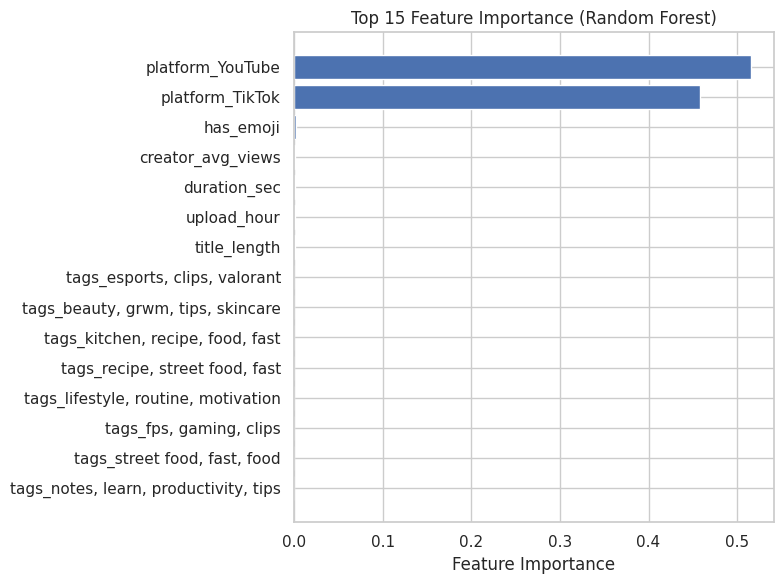

In [ ]:
import matplotlib.pyplot as plt

top_n = 15
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(8, 6))
plt.barh(top_features["feature"][::-1], top_features["importance"][::-1])
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

### Platform adalah faktor dominan

- platform_YouTube dan platform_TikTok menyumbang mayoritas total importance.
- model terutama membedakan engagement berdasarkan platform distribusi, bukan karakteristik konten halus.

### Fitur konten bersifat pendukung

- has_emoji, duration_sec, creator_avg_views, upload_hour, title_length.
- Kontribusinya jauh lebih kecil dibanding platform.
- Artinya, efeknya bersifat kondisional setelah platform diketahui.

### Fitur kategorikal spesifik berdampak kecil

- Tag (tags_*), waktu publikasi (publish_dayofweek_*, publish_period_*), region, hashtag
- Importance rendah → pengaruh marginal terhadap prediksi akhir.

## 9. Export model pipeline

### train ulang

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

champion_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=80,
        max_depth=14,
        random_state=42,
        n_jobs=-1
    ))
])


In [ ]:
champion_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration_sec',
                                                   'title_length', 'has_emoji',
                                                   'upload_hour', 'is_weekend',
                                                   'creator_avg_views']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['platform', 'genre',
                                                   'category', 'title_keywords',
                                                   'hashtag', 'tags',
                                                   'publish_dayofweek',
                                                   'publish_period', 'country',
                                                   'region', 'language',
                                                   'event_season', 'season',
                                                   'creator_tier'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=14, n_estimators=80, n_jobs=-1,
                                       random_state=42))])

### download

In [ ]:
joblib.dump(champion_model, "content_engagement_rf.joblib")

['content_engagement_rf.joblib']

In [ ]:
import os
os.getcwd(), os.listdir()

('/content',
 ['.config', 'drive', 'content_engagement_rf.joblib', 'sample_data'])

In [ ]:
from google.colab import files
files.download("content_engagement_rf.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>